In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [35]:
from shapely import wkt

In [2]:
pd.set_option('display.max_columns', None)

### Figura rutas por 10 cudades principales de cada ano

In [3]:
df_mun = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\1. Detenciones INM\\mun2020-2024.csv')

# Pivotar el DataFrame
df_pivot = df_mun.pivot_table(index="Municipio", columns="Año", values="Total", fill_value=0).reset_index()



In [5]:
# Extraer la parte después de la coma en cada valor de la columna 'Municipio'
df_pivot['Estado'] = df_pivot['Municipio'].str.split(',').str[1].str.strip()

# Obtener una lista única de los estados
estados_unicos = df_pivot['Estado'].unique()

# Mostrar la lista de valores únicos
print(estados_unicos)


['Chis.' 'Méx.' 'Gro.' 'Oax.' 'Ver.' 'Hgo.' 'Coah.' 'Son.' 'Ags.' 'Sin.'
 'Tamps.' 'NL' 'Mor.' 'Tlax.' 'Qro.' 'Gto.' 'Mich.' 'Jal.' 'Chih.'
 'Q. Roo' 'Nay.' 'Tab.' 'CDMX' 'Camp.' 'Zac.' 'SLP' 'Yuc.' 'Col.' 'Dgo.'
 'BC' 'Pue.' 'BCS' 'oaX.']


In [24]:
df_pivot

,Municipio,2020,2021,2022,2023,2024
0,"Acacoyagua, Chiapas",0,0,0,2,0
1,"Acala, Chiapas",0,0,0,0,1
2,"Acambay de Ruiz Castaneda, Estado de Mexico",0,0,0,1,0
3,"Acapetahua, Chiapas",257,0,4572,6320,85
4,"Acapulco de Juarez, Guerrero",17,122,36,32,0
...,...,...,...,...,...,...
648,"Zumpango, Estado de Mexico",0,8,0,155,947
649,"Alamo Temapache, Veracruz",0,0,0,3,0
650,"Alvaro Obregon, Michoacan",0,0,0,1,0
651,"Angel Albino Corzo, Chiapas",0,0,24,0,0


In [42]:
#df_merged.to_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\top10mun.csv')
#df_pivot = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\top10mun.csv')

In [44]:
df = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\top10mun.csv')

# Lista de los años a procesar (2020 a 2024 en este caso)
years = [2020, 2021, 2022, 2023, 2024]

# Lista para almacenar los resultados de las 10 ciudades con más eventos por cada año
top_cities = []

# Loop sobre cada año para extraer el top 10
for year in years:
    # Crear una columna 'eventos' temporal con los valores de cada año
    df_year = df[['nommun', str(year), 'id_poligon', 'geometry']].copy()
    df_year.columns = ['nommun', 'eventos', 'id_poligon', 'geometry']  # Renombrar las columnas

    # Calcular el total de eventos del año
    total_eventos_year = df_year['eventos'].sum()

    # Añadir la columna de porcentaje
    df_year['porcentaje'] = (df_year['eventos'] / total_eventos_year) * 100

    # Filtrar las 10 ciudades con más eventos para el año actual
    top_10 = df_year.nlargest(10, 'eventos')

    # Agregar el año como columna para diferenciar los registros
    top_10['year'] = year

    # Añadir el resultado al listado
    top_cities.append(top_10)

# Concatenar todos los DataFrames en uno solo
df_top_cities = pd.concat(top_cities)

# Mostrar el DataFrame resultante
print(df_top_cities)


                        nommun  eventos id_poligon  \
404        Reynosa, Tamaulipas    13285     PG1233   
528         Tapachula, Chiapas     6260     PG1530   
385   Piedras Negras, Coahuila     4062     PG1081   
6           Acayucan, Veracruz     3704     PG1378   
521          Suchiate, Chiapas     3561     PG1529   
213         Hermosillo, Sonora     3474      PG497   
371          Palenque, Chiapas     3309     PG1572   
542         Tenosique, Tabasco     2950     PG1572   
595      Tuxtla Chico, Chiapas     2594     PG1529   
596  Tuxtla Gutierrez, Chiapas     1884     PG1493   
564   Tijuana, Baja California    29615      PG190   
231      Huimanguillo, Tabasco    18618     PG1456   
404        Reynosa, Tamaulipas    17304     PG1233   
528         Tapachula, Chiapas    16334     PG1530   
6           Acayucan, Veracruz    14530     PG1378   
213         Hermosillo, Sonora    13995      PG497   
542         Tenosique, Tabasco    10718     PG1572   
596  Tuxtla Gutierrez, Chiap

In [51]:
#df_top_cities

In [49]:
# Convertir la columna de geometría de texto (si es que está en texto) a objetos geométricos (POINT)
#df_top_cities['geometry'] = df_top_cities['geometry'].apply(wkt.loads)

# Crear un GeoDataFrame con la geometría correspondiente
#gdf_top_cities = gpd.GeoDataFrame(df_top_cities, geometry='geometry')

# Establecer el sistema de referencia de coordenadas (CRS), si es WGS 84 (EPSG:4326), lo más común para coordenadas geográficas
#gdf_top_cities.set_crs(epsg=4326, inplace=True)


In [47]:
gdf_top_cities.to_file('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\top10mun.shp')

Año 2020:


,nommun,eventos,id_poligon,geometry,porcentaje,year
404,"Reynosa, Tamaulipas",13285,PG1233,POINT (-98.27882 26.09077),16.126683,2020
528,"Tapachula, Chiapas",6260,PG1530,POINT (-92.26093 14.90429),7.599024,2020
385,"Piedras Negras, Coahuila",4062,PG1081,POINT (-100.51484 28.70417),4.930868,2020
6,"Acayucan, Veracruz",3704,PG1378,POINT (-94.91458 17.94879),4.496292,2020
521,"Suchiate, Chiapas",3561,PG1529,POINT (-92.24196 14.63217),4.322704,2020


Año 2021:


,nommun,eventos,id_poligon,geometry,porcentaje,year
564,"Tijuana, Baja California",29615,PG190,POINT (-117.01953 32.53174),9.562727,2021
231,"Huimanguillo, Tabasco",18618,PG1456,POINT (-93.66344 17.76210),6.011779,2021
404,"Reynosa, Tamaulipas",17304,PG1233,POINT (-98.27882 26.09077),5.587487,2021
528,"Tapachula, Chiapas",16334,PG1530,POINT (-92.26093 14.90429),5.274273,2021
6,"Acayucan, Veracruz",14530,PG1378,POINT (-94.91458 17.94879),4.691758,2021


Año 2022:


,nommun,eventos,id_poligon,geometry,porcentaje,year
528,"Tapachula, Chiapas",45672,PG1530,POINT (-92.26093 14.90429),10.346867,2022
564,"Tijuana, Baja California",34723,PG190,POINT (-117.01953 32.53174),7.866401,2022
521,"Suchiate, Chiapas",28889,PG1529,POINT (-92.24196 14.63217),6.544724,2022
6,"Acayucan, Veracruz",27028,PG1378,POINT (-94.91458 17.94879),6.123119,2022
213,"Hermosillo, Sonora",23080,PG497,POINT (-110.96922 29.09482),5.228711,2022


Año 2023:


,nommun,eventos,id_poligon,geometry,porcentaje,year
231,"Huimanguillo, Tabasco",86684,PG1456,POINT (-93.66344 17.76210),11.128928,2023
92,"Centro, Tabasco",74160,PG1495,POINT (-92.77479 18.02716),9.521034,2023
528,"Tapachula, Chiapas",70665,PG1530,POINT (-92.26093 14.90429),9.072328,2023
542,"Tenosique, Tabasco",39620,PG1572,POINT (-91.42202 17.47071),5.086615,2023
6,"Acayucan, Veracruz",36446,PG1378,POINT (-94.91458 17.94879),4.679121,2023


Año 2024:


,nommun,eventos,id_poligon,geometry,porcentaje,year
92,"Centro, Tabasco",107606,PG1495,POINT (-92.77479 18.02716),15.108407,2024
528,"Tapachula, Chiapas",87845,PG1530,POINT (-92.26093 14.90429),12.333866,2024
231,"Huimanguillo, Tabasco",64851,PG1456,POINT (-93.66344 17.76210),9.105396,2024
300,"Macuspana, Tabasco",45254,PG1534,POINT (-92.59611 17.76092),6.353882,2024
521,"Suchiate, Chiapas",32270,PG1529,POINT (-92.24196 14.63217),4.530865,2024


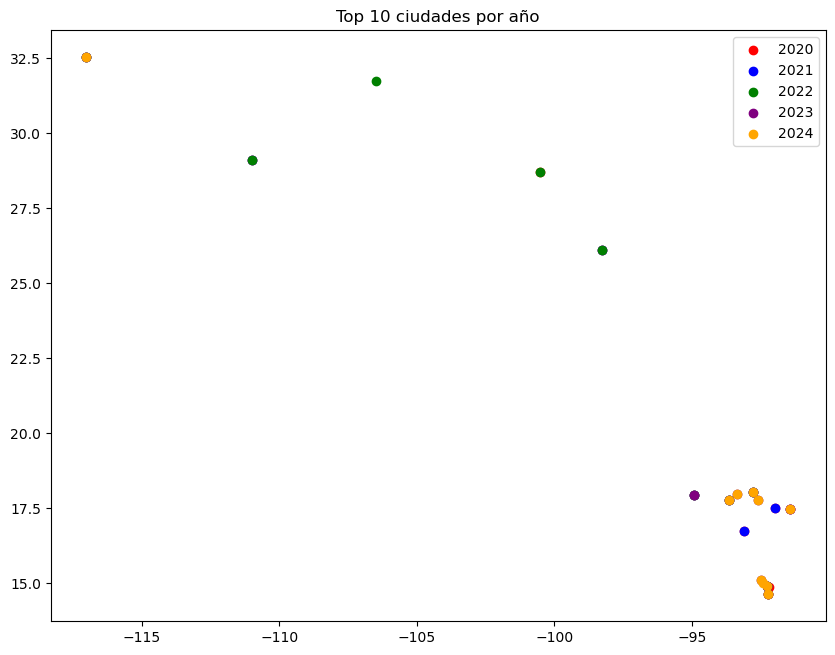

In [52]:
# Filtrar los GeoDataFrames por cada año
gdf_2020 = gdf_top_cities[gdf_top_cities['year'] == 2020]
gdf_2021 = gdf_top_cities[gdf_top_cities['year'] == 2021]
gdf_2022 = gdf_top_cities[gdf_top_cities['year'] == 2022]
gdf_2023 = gdf_top_cities[gdf_top_cities['year'] == 2023]
gdf_2024 = gdf_top_cities[gdf_top_cities['year'] == 2024]

# Visualizar los primeros registros de cada GeoDataFrame para asegurarte de que estén correctos
print("Año 2020:")
display(gdf_2020.head())

print("Año 2021:")
display(gdf_2021.head())

print("Año 2022:")
display(gdf_2022.head())

print("Año 2023:")
display(gdf_2023.head())

print("Año 2024:")
display(gdf_2024.head())

# Si deseas visualizar el trazo de los puntos en un mapa (usando GeoPandas plot):
import matplotlib.pyplot as plt

# Visualizar todos los años juntos en un solo gráfico
fig, ax = plt.subplots(figsize=(10, 8))
gdf_2020.plot(ax=ax, color='red', label='2020')
gdf_2021.plot(ax=ax, color='blue', label='2021')
gdf_2022.plot(ax=ax, color='green', label='2022')
gdf_2023.plot(ax=ax, color='purple', label='2023')
gdf_2024.plot(ax=ax, color='orange', label='2024')

# Añadir leyenda
plt.legend()
plt.title('Top 10 ciudades por año')
plt.show()
